# Statistics II Final Exam (Spring, 2022)

Name: __________吳驊祐___________(fill in your name here)

Student ID: ________b09705009__________(fill in your student ID here)

Total 100 points. 

Remember:
* Academic integrity. It is not a group exam. Please work on the exam by yourself. Do not cheat! Students caught cheating will get a zero score for this exam. (考試作弊者零分。)
* If you have any questions or comments, ask your instructor or TAs instead of students. (有問題請問助教或老師。)
* You should not engage in any form of online diaglog. Students using search engines, online chatting, or social media websites will recieve a zero score for this exam.  (考試期間使用搜尋引擎、線上聊天工具、或社群網站如Line, Facebook等將被視為作弊行為，本次考試將得零分。)
* Use Jupyter Lab to answer all exam questions. (使用Jupyter Lab回答所有問題。)
* 考試時間結束後將ipynb轉成HTML檔案上傳至COOL作業區。
* 所有同學必須在COOL作業區規定時間內上傳答案。
* 如果題目沒有特別說明，則假設檢定使用5%顯著水準。如果題目有說明其使用之顯著水準則從其規定。
* 如果題目沒有特別要求，主要結果請四捨五入至小數點第四位。
* 回答所有題目時需要明確說明使用的統計方法。

In [90]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 65
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import statistics
import math
import warnings
import itertools
from statsmodels.tsa.api import Holt
from scipy.optimize import curve_fit
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Problem 1 (30 points)
##### Butler, Inc. is a company that sells products in several sales territories, each of which is assigned to a single sales representative. The director of sales department is conducting a study to determine whether a variety of variables could explain the variates of sales in each territory. A random sample of 25 sales territories is listed in the spreadsheet “Butler” of Stat_2021_2_Fin.xlsx. Each sales territory has the variables defined as follows:
* Column A (Sales): Total sales credited to the sales representative.
* Column B (Time): Length of time employed in months.
* Column C (Poten): Market potential; total industry sales in units for the sales territory.
* Column D (AdvExp): Advertising expenditure in the sales territory.
* Column E (Share): Market share; weighted average for the past four years.
* Column F (Change): Change in the market share over the previous four years.
* Column G (Accounts): Number of accounts assigned to the sales representative.
* Column H (Work): Workload; a weighted index based on annual purchases and concentrations of accounts.
* Column I (Rating): Sales representative overall rating on eight performance dimensions; an aggregate rating on a 1–7 scale.

##### Questions:
1. (5 points) Please plot the scatter diagrams by using Sales as y and columns B to I as x. Do you see linear patterns? Please infer the linear relationships from these scatter diagrams.
2. (2 points) Please calculate the coefficients of correlation among columns A to I. Can you infer any multicollinearity problem from these coefficients?
3. (4 points) Develop an estimated linear regression model that can be used to predict “Sales” given that all the columns from B to I are independent variables. Please check the multicollinearity condition based on the estimated linear regression model with the scatter diagrams in (1) and coefficients of correlation in (2).
4. (4 points) Please use the stepwise regression method to redo the model. Please check the multicollinearity condition of this model. 
5. (4 points) Please use best-subset regression method in r (use adjusted R2 as selection criteria) to redo the model. Please check the multicollinearity condition and select a best suitable model.
6. (3 points) Please check the required conditions for the result of (5) (normality, homoscedasticity, and independence).
7. (4 points) Please assess the regression equation in (5) by Se, R2, adjusted R2, F-test, and t-test.
8. (4 points) Please use the model in (5) to predict 95% interval of “Sales” for a specific sales territory or the average “Sales” for some sales territories with Time = 132.25, Poten = 48,123.22, AdvExp = 5,123, Share = 7.62, Change = .18, Accounts = 138.65, Work = 15.13, and Rating = 3.8. Please interpret these intervals.

In [91]:
def forward_selection(input_df, depv="y", indepv = ["x1"]):
    selected = []
    candidates = indepv.copy()
    best_adjr2 = -1
    best_subset = []
    while len(candidates) > 0:
        print("Current Candidates: ", candidates)
        tmp_indep_subset = []
        tmp_model_adjr = []
        tmp_model_nindep = []
        for acandidate in candidates:
            tmplist = selected.copy()
            tmplist.append(acandidate)
            modelstr = depv + " ~ " + "+".join(tmplist)
            result6tmp = smf.ols(modelstr, data=input_df).fit()
            tmp_indep_subset.append(tmplist)
            tmp_model_adjr.append(result6tmp.rsquared_adj)
            tmp_model_nindep.append(len(tmplist))
        tmp_adjr2 = np.array(tmp_model_adjr)
        tmpind = tmp_adjr2.argmax()
        this_adjr2 = tmp_adjr2[tmpind]
        selected = tmp_indep_subset[tmpind]
        if this_adjr2 <= 0:
            raise("Encounterd negative Adj R2. Stop.")
        print("===============")
        print("Current best model: ", selected)
        print("Current best AdjR2: ", this_adjr2)
        if this_adjr2 > best_adjr2:
            #print(" best result updated")
            best_adjr2 = this_adjr2
            best_subset = selected
        candidates = set(candidates) - set(selected)
        candidates = list(candidates)
    print("best_adjr2 = ", best_adjr2)
    print("best_subset = ", best_subset)
    modelstr = depv + " ~ " + "+".join(best_subset)
    result6b = smf.ols(modelstr, data=input_df).fit()
    print(result6b.summary()) 
import time
import itertools

def processSubset(y_v, X_v, feature_set):
    X_v_a = sm.add_constant(X_v[list(feature_set)])
    model = sm.OLS(y_v,X_v_a)
    regr = model.fit()
    RSS = regr.rsquared_adj
    return {"model":regr, "RSS":RSS}

def getBest(y_g, X_g, k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X_g.columns, k):
        results.append(processSubset(y_g, X_g, combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmax()]
    toc = time.time()
    return best_model

In [92]:
df1 = pd.read_excel('Stat_2021_2_Fin.xlsx', sheet_name = 'Butler')
print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Sales,Time,Poten,AdvExp,Share,Change,Accounts,Work,Rating
0,3669.88,43.10,74065.1,4582.9,2.51,0.34,74.86,15.05,4.9
1,3473.95,108.13,58117.3,5539.8,5.51,0.15,107.32,19.97,5.1
2,2295.10,13.82,21118.5,2950.4,10.91,-0.72,96.75,17.34,2.9
3,4675.56,186.18,68521.3,2243.1,8.27,0.17,195.12,13.40,3.4
4,6125.96,161.79,57805.1,7747.1,9.15,0.50,180.44,17.64,4.6


Tail of dataset:


,Sales,Time,Poten,AdvExp,Share,Change,Accounts,Work,Rating
20,1741.45,10.57,23990.8,861.0,7.37,-1.63,75.61,20.99,1.6
21,2035.75,13.82,25694.9,3571.5,8.39,-0.43,102.44,21.66,3.4
22,1578.00,8.13,23736.3,2845.5,5.15,0.04,76.42,21.46,2.7
23,4167.44,58.44,34314.3,5060.1,12.88,0.22,136.58,24.78,2.8
24,2799.97,21.14,22809.5,3552.0,9.14,-0.74,88.62,24.96,3.9


1-1 

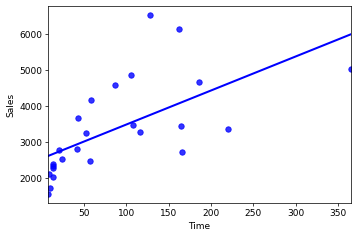

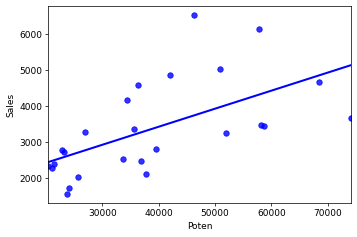

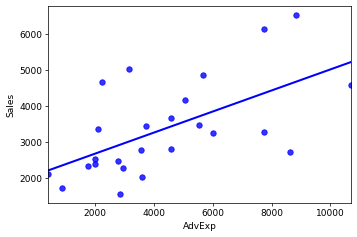

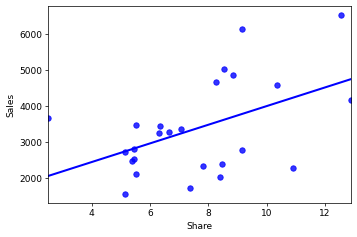

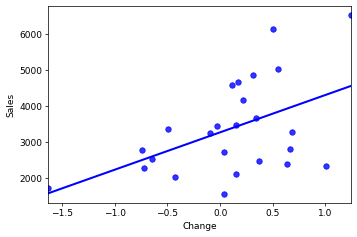

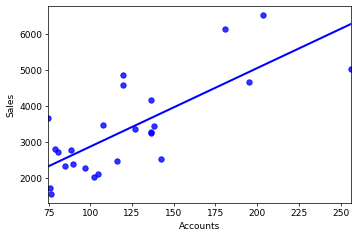

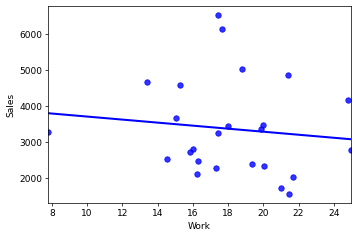

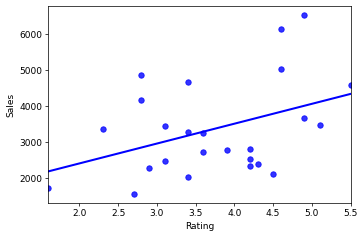

In [93]:
y_var = df1['Sales'].values
xnames = df1.columns[1:]
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Sales')
    plt.show()

All of them are linearly related to sales<br>
positively correlated: all the others<br>
negatively correlated: Work

1-2

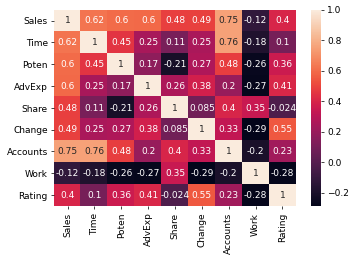

In [94]:
df1_a = df1[df1.columns]
corr1 = df1_a.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

All variables but work are positively correlated to Appraised Value. But the linear relationship between Accounts and Time is 0.76, there may be some multicollinearity problem to discuss.

1-3

In [95]:
y_data = df1['Sales']
X_data_ar = np.array([df1['Time'], df1["Poten"], df1['AdvExp'], df1['Share'], df1['Change'], df1['Accounts'], df1['Work'], df1['Rating']])
X_data_T = X_data_ar.T
columns = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating']
X_data = pd.DataFrame(X_data_T, columns = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result = olsmod.fit()
print(result.summary())
print()
s = f"Estimated model: y = {result.params[0]:.4f} "
for i in range(1, len(result.params)):
    s += f'+ {result.params[i]:.4f} {columns[i - 1]} '
print(s)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     23.66
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.81e-07
Time:                        17:20:25   Log-Likelihood:                -182.57
No. Observations:                  25   AIC:                             383.1
Df Residuals:                      16   BIC:                             394.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1507.8358    778.608     -1.937      0.0

p-value of F-test, t-test are ok, but the coefficient of 'work' is positive, which differs from our previous heat map and scatter plot.

The model is invalid.There is multicollinearity problem.<br>
1-4

In [96]:
forward_selection(input_df = df1, depv = 'Sales', indepv = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating'])

Current Candidates:  ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating']
Current best model:  ['Accounts']
Current best AdjR2:  0.5497341027962391
Current Candidates:  ['Change', 'AdvExp', 'Rating', 'Time', 'Poten', 'Share', 'Work']
Current best model:  ['Accounts', 'AdvExp']
Current best AdjR2:  0.7546560510491322
Current Candidates:  ['Change', 'Rating', 'Time', 'Poten', 'Share', 'Work']
Current best model:  ['Accounts', 'AdvExp', 'Poten']
Current best AdjR2:  0.8031118352820324
Current Candidates:  ['Change', 'Rating', 'Time', 'Share', 'Work']
Current best model:  ['Accounts', 'AdvExp', 'Poten', 'Share']
Current best AdjR2:  0.8805395638248092
Current Candidates:  ['Time', 'Change', 'Work', 'Rating']
Current best model:  ['Accounts', 'AdvExp', 'Poten', 'Share', 'Change']
Current best AdjR2:  0.8893672715464176
Current Candidates:  ['Time', 'Work', 'Rating']
Current best model:  ['Accounts', 'AdvExp', 'Poten', 'Share', 'Change', 'Time']
Current best AdjR2:  0

The best subset is ['Accounts', 'AdvExp', 'Poten', 'Share', 'Change', 'Time']

All of their sign of coefficient is the same with our scatter plot and heat map.

Also, the pvalue of F-test < 0.05 and there is at least one pvalue of $b_i$ < 0.5 which means is not equal to zero, and there are some variables can pass the t-test. So we can assume that the model doesn't have multicollinearity problem.

1-5

In [97]:
y_data = df1['Sales']
X_data_ar = np.array([df1['Time'], df1["Poten"], df1['AdvExp'], df1['Share'], df1['Change'], df1['Accounts'], df1['Work'], df1['Rating']])
X_data_T = X_data_ar.T
columns = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating']
X_data = pd.DataFrame(X_data_T, columns = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts', 'Work', 'Rating'])
#X_data2 = sm.add_constant(X_data)
models_best = pd.DataFrame(columns=["RSS", "model"])
#print("aaa",models_best)
tic = time.time()
for i in range(1, len(columns) + 1):
    models_best.loc[i] = getBest(y_var, X_data, i)
#print("aaa",models_best)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")
Fb = models_best[models_best['RSS']==models_best.RSS.max()].index.values
result = models_best.loc[Fb[0], "model"]
print(models_best.loc[Fb[0], "model"].summary())
columns = ['Time', 'Poten', 'AdvExp', 'Share', 'Change', 'Accounts']
print()
s = f"Estimated model: y = {result.params[0]:.4f} "
for i in range(1, len(result.params)):
    s += f'+ {result.params[i]:.4f} {columns[i - 1]} '
print(s)

Total elapsed time: 0.6184728145599365 seconds.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     34.65
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           6.14e-09
Time:                        17:20:26   Log-Likelihood:                -182.84
No. Observations:                  25   AIC:                             379.7
Df Residuals:                      18   BIC:                             388.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

The best subset is ['Accounts', 'AdvExp', 'Poten', 'Share', 'Change', 'Time']

All of their sign of coefficient is the same with our scatter plot and heat map.

Also, the pvalue of F-test < 0.05 and there is at least one pvalue of $b_i$ < 0.5 which means is not equal to zero, and there are some variables can pass the t-test. So we can assume that the model doesn't have multicollinearity problem.
1-6

In [98]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
#print("Columns in data are: %s" % ss2)
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
#print(SD)
#print('mu = ', mu)
#print('sigma = ', sigma)

### Normality Test
$H_0$: Errors are normally distributed.

$H_1$: Errors are not normally distributed.

Shapiro Test
Statistics=0.940, p=0.145


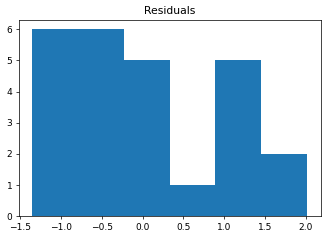

In [99]:
fig = plt.hist(SD, bins='auto')
plt.title('Residuals')
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

p_value = 0.145 > 0.05, so we can't reject null hypothesis. We can say that the data is normally distributed.<br>
### Homoscedasticity and Heteroscedasticity
$H_0$: The requirement of a constant variance is not violated

$H_1$: The requirement of a constant variance is violated

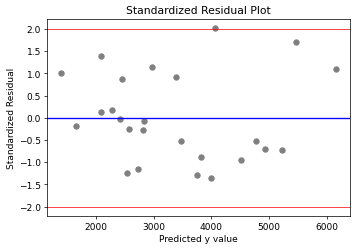

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.


In [100]:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()
print("Do not rejected H0. We can assume that the variation is constant and the mean is around 0.")

### Dependence ,run test
$H_0$: Randomness exists.

$H_1$: Randomness does not exist.

In [101]:
def runtest(SD):
    SD_median = statistics.median(SD)
    
    runs, n1, n2 = 1, 0, 0
    if(SD[0]) >= SD_median: 
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(1, len(SD)): 
        # no. of runs 
        if (SD[i] >= SD_median and SD[i-1] < SD_median) or (SD[i] < SD_median and SD[i-1] >= SD_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(SD[i]) >= SD_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    if n1>20 or n2>20:
        print('\nruns_exp = ', runs_exp)
        print('stan_dev = ', stan_dev)
        print('z = ', z)
        print('pval_z = ', pval_z)
        
        if pval_z < 0.05:
            print('\nSince p-value < 0.05, we reject H0 and conclude randomness does not exist.')
        else:
            print('\nSince p-value > 0.05, we do not reject H0 and we may conclude randomness exists.')
    else:
        print('Since both n1 and n2 < 20, we check the Run Test table.')

runs =  15
n1 =  13
n2 =  12
Since both n1 and n2 < 20, we check the Run Test table.


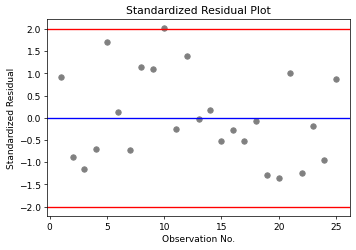

In [102]:
runtest(SD)
Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

After checking the run table, we know that<br>
8 < runs=15 < 19, we do not reject the null hypothesis.<br>
Randomness exist.
1-7

In [103]:
print("standard error = ", result.mse_resid ** 0.5)
print("mean of y", df1['Sales'].mean())
print("std of y", df1['Sales'].std())

standard error =  427.9942153153427
mean of y 3374.5675999999994
std of y 1313.06811398051


We can compare the mean of y with std error, and find out that the std error is relatively small, it is a good model which fits 'Sales' well.<br>
the $R^2$ = 0.920, means that 92% of the variation of 'Sales' can be explained by this model and other remains unexplained. The Adj $R^2$ = 0.894, is close the the $R^2$, means that there is no overfitting problem.<br>
#### f-test
$H_0$: $\beta_i$  = 0 for all i

$H_1$: At least one $\beta_i$ $\neq$ 0

In [104]:
f_res = result.fvalue
MSE = result.mse_resid
df_model = result.df_model
df_error = result.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result.params))
A = A[1:,:]
print(result.f_test(A))

SSR =  38082326.05667487 df =  6.0 MSR =  6347054.342779145
SSE =  3297222.870181126 df =  18.0 MSE =  183179.0483433959
F =  34.649455820300275
<F test: F=array([[34.64945585]]), p=6.137835699439918e-09, df_denom=18, df_num=6>


pvalue = 6.137835699439918e-09 < 0.05, we can reject H0. There is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. At least one of the $\beta_i$ is not equal to zero. Thus, at least one independent variable is related to y. This regression model is valid.

#### testing of the coefficients

$H_0$: $\beta_i$ = 0

$H_1$: $\beta_i \neq$ 0

pvalue of Time = 0.198 > 0.05, we can't reject H0. There isn't sufficient evidence to conclude that there is a linear relationship between Time and sales

pvalue of Poten = 0.000 < 0.05, we can reject H0. There is sufficient evidence to conclude that there is a linear relationship between Poten and Sales

pvalue of AdvExp = 0.002 < 0.05, we can reject H0. There is sufficient evidence to conclude that there is a linear relationship between AdvExp and Sales

pvalue of Share = 0.000 < 0.05, we can reject H0. There is sufficient evidence to conclude that there is a linear relationship between Share and Sales

pvalue of Change = 0.000 < 0.093, we can't reject H0. There isn't sufficient evidence to conclude that there is a linear relationship between Change and Sales

pvalue of Accounts = 0.288 > 0.05, we can't reject H0. There isn't sufficient evidence to conclude that there is a linear relationship between Accounts and sales<br>
<br>
1-8 Please use the model in (5) to predict 95% interval of “Sales” for a specific sales territory or the average “Sales” for some sales territories with Time = 132.25, Poten = 48,123.22, AdvExp = 5,123, Share = 7.62, Change = .18, Accounts = 138.65, Work = 15.13, and Rating = 3.8. Please interpret these intervals.

In [105]:
def CI_PI_regression(xdata, yval, x1, a):
    print("make CI and PI prediction at mean of x = ", x1)
    X_data_T = xdata.T
    X_data2 = sm.add_constant(X_data_T)
    olsmod = sm.OLS(yval, X_data2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x1)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    core1 = (result_reg.mse_resid * np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1))) ** 0.5
    lower_bound = y_head +  t_minus * core1
    upper_bound = y_head +  t_plus * core1
    print("confidence interval of mean = [%0.4f, %0.4f] " % (lower_bound, upper_bound))
    core2 = (result_reg.mse_resid * (1 + np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1)))) ** 0.5
    lower_bound2 = y_head +  t_minus * core2
    upper_bound2 = y_head +  t_plus * core2
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

In [106]:
#1-8
X_data_ar = np.array([df1['Time'], df1['Poten'], df1['AdvExp'], df1['Share'], df1['Change'], df1['Accounts']])
xg = np.array([1, 132.25, 48123.22, 5123, 7.62, 0.18, 138.65])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.05)
print("We want: Prediction interval = [3117.9868, 4970.5963]")

make CI and PI prediction at mean of x =  [1.000000e+00 1.322500e+02 4.812322e+04 5.123000e+03 7.620000e+00
 1.800000e-01 1.386500e+02]
y_head =  4044.291561707589
confidence interval of mean = [3821.7801, 4266.8030] 
Prediction interval = [3117.9868, 4970.5963] 
We want: Prediction interval = [3117.9868, 4970.5963]


In [107]:
def SI_MA(y_v, n):
    y_v_MA_a = np.zeros(len(y_v))
    y_v_MA_a[:] = np.nan
    mvlen = n
    if n % 2 == 0:
        halfwin = int(mvlen / 2)
        y_v_MA_ta = np.zeros(len(y_v))
        for i in range(halfwin, len(y_v) - halfwin + 1):
            y_v_MA_ta[i] = np.mean(y_v[(i-halfwin): (i+halfwin)])
        for ii in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[ii] = np.mean(y_v_MA_ta[(ii): (ii+2)])
    else:
        halfwin = int((mvlen - 1) / 2)
        for i in range(halfwin, len(y_v) - halfwin):
            y_v_MA_a[i] = np.mean(y_v[(i-halfwin): (i+halfwin+1)])
    SI_MA_a = np.zeros(len(y_v))
    SI_MA_a[:] = np.nan
    SI_MA_a = y_v / y_v_MA_a    
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_MA_a_df = pd.DataFrame({'SIMA': SI_MA_a, 'SIid': SI_id})
    SI_MA_u = np.zeros(n)
    for j in range(1,n+1):
        SI_MA_u[j-1] = SI_MA_a_df['SIMA'][SI_MA_a_df['SIid'] == j].dropna().mean()  
    SI_MA = SI_MA_u / sum(SI_MA_u) * n
    print('Seasonal Index:', SI_MA)
    for i, each in enumerate(SI_MA):
        curr = each - 1
        if curr >= 0:
            print(f'{i + 1} = {each} which is {(abs(curr)*100):.4f} higher than the average')
        else:
            print(f'{i + 1} = {each} which is {(abs(curr)*100):.4f} lower than the average')
    print('\n')  
    y_v_SI_MA = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_MA_a_df['SIid'][k] - 1)
        y_v_SI_MA[k] = SI_MA[Idd]
        DSI_y_v[k] = y_v[k] / SI_MA[Idd]
    print('Deseasonalized Data:', DSI_y_v)
    SI_MA_result_a = np.array([SI_MA_a_df['SIid'], y_v_SI_MA, y_v, DSI_y_v])
    SI_MA_result_df = pd.DataFrame(SI_MA_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"ma_ind":SI_MA, "SI_MA_res":SI_MA_result_df}
def SI_LR(y_v, n):
    y_data = y_v
    X_data_ar = np.arange(1, len(y_v)+1)
    X_data_T = X_data_ar.T
    X_data = pd.DataFrame(X_data_T,columns = ['Time'])
    X_data = sm.add_constant(X_data)
    olsmod = sm.OLS(y_data, X_data)
    result_reg = olsmod.fit()
    st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
    y_v_LR_a = data[:, 2]
    SI_LR_a = y_v / y_v_LR_a
    SI_id_s = np.arange(1,len(y_v)+1)
    SI_id = SI_id_s - np.floor(SI_id_s / n) * n
    SI_id[np.where((SI_id[:] == 0))] = n
    SI_LR_a_df = pd.DataFrame({'SILR': SI_LR_a, 'SIid': SI_id})
    SI_LR_u = np.zeros(n)
    for j in range(1,n+1):
        SI_LR_u[j-1] = SI_LR_a_df['SILR'][SI_LR_a_df['SIid'] == j].dropna().mean()
    SI_LR = SI_LR_u / sum(SI_LR_u) * n
    print('Seasonal Index:', SI_LR)
    for i, each in enumerate(SI_LR):
        curr = each - 1
        if curr >= 0:
            print(f'{i + 1} = {each} which is {(abs(curr)*100):.4f} higher than the average')
        else:
            print(f'{i + 1} = {each} which is {(abs(curr)*100):.4f} lower than the average')
    print('\n')
    y_v_SI_LR = np.zeros(len(y_v))
    DSI_y_v = np.zeros(len(y_v))
    for k in range(0,len(y_v)):
        Idd = int(SI_LR_a_df['SIid'][k] - 1)
        y_v_SI_LR[k] = SI_LR[Idd]
        DSI_y_v[k] = y_v[k] / SI_LR[Idd]
    print('Deseasonalized Data:', DSI_y_v)
    SI_LR_result_a = np.array([SI_LR_a_df['SIid'], y_v_SI_LR, y_v, DSI_y_v])
    SI_LR_result_df = pd.DataFrame(SI_LR_result_a.T, columns = ['SID', 'SeaIdx', 'orig', 'Des_D'])
    return {"LR_ind":SI_LR, "SI_LR_res":SI_LR_result_df}



## Problem 2 (25 points)
##### The Vintage Restaurant, on Captiva Island near Fort Myers, Florida, is owned and operated by Karen Payne. The restaurant just completed its third year of operation. Since opening hear restaurant, Karen has sought to establish a reputation for the Vintage as a high-quality dining establishment that specializes in fresh seafood. Through the efforts of Karen and hear staff, her restaurant has become one of the best and fastest growing restaurants on the island. To better plan for future growth of the restaurant, Karen needs to develop a system that will enable her to forecast food and beverage sales by month for up to one year in advance. Sales of restaurants are often seasonal, fluctuating with holiday season. The value of food and beverage sales (in 1000 dollars) for the first three years of operation has been recorded and listed in the spreadsheet “Vintage” of Stat_2021_2_Fin.xlsx. Each period has the variables defined as follows:
* Column A (Time): Time period.
* Column B (Sales): The value of food and beverage sales (in 1000 dollars).
* Column C (Month): Month of the period.

##### Questions:
1. (4 points) Please use 12-period centered moving average to find the seasonal indexes for the 12 months. Interpret the indexes (the biggest and the slowest seasons).
2. (4 points) Please use simple linear regression method to find the seasonal indexes for the 12 months. Interpret the indexes (the biggest and the slowest seasons).
3. (4 points) Please use the indexes found in (1) to deseasonalize monthly sales, find the simple linear regression model, and forecast sales for each month of next year.
4. (4 points) Please use the indexes found in (2) to deseasonalize monthly sales, find the simple linear regression model, and forecast sales for each month of next year. 
5. (4 points) Please use the addition model with indicator variables to represent months to find the regression model and forecast sales for each month of next year.
6. (5 points) Compute the MSE, MAD, and MAPE for the above three methods using the historical monthly sales. According to the results, which method is the best?

Tail of dataset:


,Time,Sales,Month
31,32,174,8
32,33,126,9
33,34,148,10
34,35,173,11
35,36,235,12


Seasonal Index: [1.44358746 1.29970047 1.34412031 1.04120171 1.04938671 0.80038072
 0.82830672 0.85297463 0.62798724 0.70032281 0.85275937 1.15927184]
1 = 1.4435874578025338 which is 44.3587 higher than the average
2 = 1.2997004716366993 which is 29.9700 higher than the average
3 = 1.3441203137845144 which is 34.4120 higher than the average
4 = 1.041201711962785 which is 4.1202 higher than the average
5 = 1.0493867106835295 which is 4.9387 higher than the average
6 = 0.8003807204683486 which is 19.9619 lower than the average
7 = 0.8283067212944912 which is 17.1693 lower than the average
8 = 0.8529746327221046 which is 14.7025 lower than the average
9 = 0.6279872403027811 which is 37.2013 lower than the average
10 = 0.7003228085497029 which is 29.9677 lower than the average
11 = 0.8527593671334829 which is 14.7241 lower than the average
12 = 1.1592718436590255 which is 15.9272 higher than the average


Deseasonalized Data: [167.63792086 180.81089076 172.60359629 170.95630746 175.3405090

,SID,SeaIdx,orig,Des_D
0,1.0,1.443587,242.0,167.637921
1,2.0,1.299700,235.0,180.810891
2,3.0,1.344120,232.0,172.603596
3,4.0,1.041202,178.0,170.956307
4,5.0,1.049387,184.0,175.340509
5,6.0,0.800381,140.0,174.916757
6,7.0,0.828307,145.0,175.055926
7,8.0,0.852975,152.0,178.199907
8,9.0,0.627987,110.0,175.162795
9,10.0,0.700323,130.0,185.628682


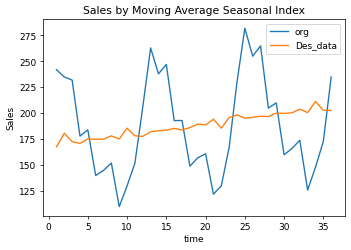

In [108]:
#2-1
df1 = pd.read_excel(r"Stat_2021_2_Fin.xlsx", 'Vintage')
print("Tail of dataset:")
display(df1.tail())
df1["t"] = df1.index + 1
df1_MA_S_result = pd.DataFrame(columns=["ma_ind", "SI_MA_res"])
df1_MA_S_result = SI_MA(df1['Sales'], 12)
df1_MA_Idx = df1_MA_S_result["ma_ind"]
print(df1_MA_Idx)
df1_MA_Result = df1_MA_S_result["SI_MA_res"]
display(df1_MA_Result)
plt.plot(df1['t'], df1_MA_Result['orig'])
plt.plot(df1['t'], df1_MA_Result['Des_D'])
plt.legend(labels=['org', 'Des_data'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Sales by Moving Average Seasonal Index')
plt.show()

Season: 1,2,3,4,5,12 are high season, season 1 is the biggest season which is 44.3587 higher than average
Season: 6,7,8,9,10,11 are slow season, season 9 is the slowest season which is 37.2013 lower than average

Seasonal Index: [1.39764942 1.29292819 1.32144335 1.02311869 1.04272048 0.7976334
 0.83143836 0.86524754 0.63609413 0.72497905 0.87429308 1.19245431]
1 = 1.397649421414099 which is 39.7649 higher than the average
2 = 1.2929281860969706 which is 29.2928 higher than the average
3 = 1.321443348635046 which is 32.1443 higher than the average
4 = 1.0231186914726351 which is 2.3119 higher than the average
5 = 1.0427204788848274 which is 4.2720 higher than the average
6 = 0.7976333973256373 which is 20.2367 lower than the average
7 = 0.8314383564184282 which is 16.8562 lower than the average
8 = 0.8652475400189699 which is 13.4752 lower than the average
9 = 0.6360941343016497 which is 36.3906 lower than the average
10 = 0.7249790529594915 which is 27.5021 lower than the average
11 = 0.8742930801645588 which is 12.5707 lower than the average
12 = 1.1924543123076878 which is 19.2454 higher than the average


Deseasonalized Data: [173.14785546 181.7579681  175.56560426 173.97785954 176.46148103


,SID,SeaIdx,orig,Des_D
0,1.0,1.397649,242.0,173.147855
1,2.0,1.292928,235.0,181.757968
2,3.0,1.321443,232.0,175.565604
3,4.0,1.023119,178.0,173.977860
4,5.0,1.042720,184.0,176.461481
5,6.0,0.797633,140.0,175.519230
6,7.0,0.831438,145.0,174.396573
7,8.0,0.865248,152.0,175.672271
8,9.0,0.636094,110.0,172.930379
9,10.0,0.724979,130.0,179.315526


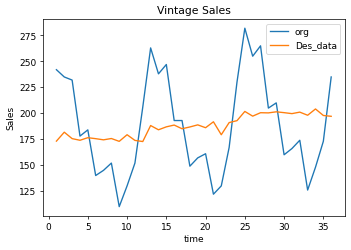

In [109]:
#2-2
df1_SILR = pd.DataFrame(columns=["LR_ind", "SI_LR_res"])
df1_SILR = SI_LR(df1['Sales'], 12)
df1_LR_Idx = df1_SILR["LR_ind"]
print(df1_LR_Idx)
df1_LR_Result = df1_SILR["SI_LR_res"]
display(df1_LR_Result)
t_r = np.arange(1, len(df1['Sales']) + 1, 1)  # 助教答案用1開始
plt.plot(t_r, df1_LR_Result['orig'])
plt.plot(t_r, df1_LR_Result['Des_D'])
plt.legend(labels=['org', 'Des_data'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Vintage Sales')
plt.show()

The biggest seasonal indexes is 1.397649 which is at quarter 1.

The smallest seasonal indexes is 0.636094 which is at quarter 9.

Seasonal Index: [1.44358746 1.29970047 1.34412031 1.04120171 1.04938671 0.80038072
 0.82830672 0.85297463 0.62798724 0.70032281 0.85275937 1.15927184]
1 = 1.4435874578025338 which is 44.3587 higher than the average
2 = 1.2997004716366993 which is 29.9700 higher than the average
3 = 1.3441203137845144 which is 34.4120 higher than the average
4 = 1.041201711962785 which is 4.1202 higher than the average
5 = 1.0493867106835295 which is 4.9387 higher than the average
6 = 0.8003807204683486 which is 19.9619 lower than the average
7 = 0.8283067212944912 which is 17.1693 lower than the average
8 = 0.8529746327221046 which is 14.7025 lower than the average
9 = 0.6279872403027811 which is 37.2013 lower than the average
10 = 0.7003228085497029 which is 29.9677 lower than the average
11 = 0.8527593671334829 which is 14.7241 lower than the average
12 = 1.1592718436590255 which is 15.9272 higher than the average


Deseasonalized Data: [167.63792086 180.81089076 172.60359629 170.95630746 175.3405090

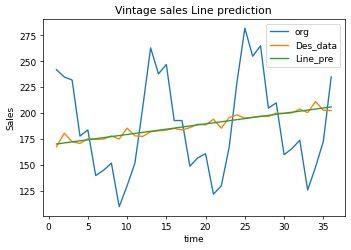

In [110]:
#2-3
df1_SIMA = pd.DataFrame(columns=["ma_ind", "SI_MA_res"])
df1_SIMA = SI_MA(df1['Sales'], 12)
df1_MA_Idx = df1_SIMA["ma_ind"]
df1_MA_Result = df1_SIMA["SI_MA_res"]
y_data_df1_MA = df1_MA_Result['Des_D']
X_data_ar_df1 = np.array(df1['t'])
X_data_ar_df1_T = X_data_ar_df1.T
columns = ['t']
X_data_df1 = pd.DataFrame(X_data_ar_df1_T, columns = ['t'])
X_data_df1 = sm.add_constant(X_data_df1)
olsmod_df1_MA = sm.OLS(y_data_df1_MA, X_data_df1)
result_reg_df1_MA = olsmod_df1_MA.fit()
print(result_reg_df1_MA.summary())
print()
s = f"Estimated model: y = {result_reg_df1_MA.params[0]:.4f} "
for i in range(1, len(result_reg_df1_MA.params)):
    s += f'+ {result_reg_df1_MA.params[i]:.4f} {columns[i - 1]} '
print(s)
df1_MA_st_2, df1_MA_data_2, df1_MA_ss2_2 = sso.summary_table(result_reg_df1_MA, alpha=0.05)
df1_MA_y_pre_2 = df1_MA_data_2[:, 2]
des_pre_df1_MA = df1_MA_y_pre_2
print(des_pre_df1_MA)
plt.plot(df1['t'], df1_MA_Result['orig'])
plt.plot(df1['t'], df1_MA_Result['Des_D'])
plt.plot(df1['t'], des_pre_df1_MA)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Vintage sales Line prediction')
plt.show()

New Des Prediction [206.11607936 207.13737599 208.15867263 209.17996926 210.20126589
 211.22256252 212.24385916 213.26515579 214.28645242 215.30774905
 216.32904569 217.35034232]
New Seasonal Prediction [297.54658702 269.21654527 279.79030037 217.7985421  220.582415
 169.05846677 175.80301509 181.90976793 134.56915789 150.78492752
 184.47662009 251.96813206]


,time,org,Des_data,Line_pre,Seasonal Pre
0,1.0,242.0,167.637921,170.370697,245.945002
1,2.0,235.0,180.810891,171.391994,222.758255
2,3.0,232.0,172.603596,172.413290,231.744206
3,4.0,178.0,170.956307,173.434587,180.580389
4,5.0,184.0,175.340509,174.455884,183.071686
5,6.0,140.0,174.916757,175.477180,140.448552
6,7.0,145.0,175.055926,176.498477,146.194875
7,8.0,152.0,178.199907,177.519774,151.419864
8,9.0,110.0,175.162795,178.541070,112.121514
9,10.0,130.0,185.628682,179.562367,125.751621


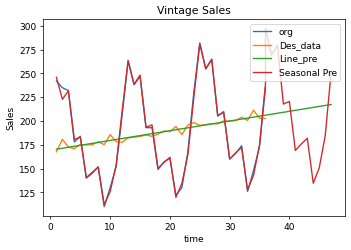

In [111]:
Sea_pre_df1_MA = des_pre_df1_MA * df1_MA_Result['SeaIdx']
New_t_2 = np.arange(36, 48, 1)
Total_t_2 = np.append(df1['t'], New_t_2)
New_t_2 = sm.add_constant(New_t_2)
df1_MA_des_pre_New_t_2 = result_reg_df1_MA.predict(New_t_2)
print('New Des Prediction', df1_MA_des_pre_New_t_2)
df1_MA_Sea_pre_New_t_2 = df1_MA_des_pre_New_t_2 * df1_MA_Idx
print('New Seasonal Prediction', df1_MA_Sea_pre_New_t_2)
New_Nan = np.zeros(New_t_2.shape[0])
New_Nan[:] = np.nan
df1_MA_New_orig_2 = np.append(df1_MA_Result['orig'], New_Nan)
df1_MA_New_Des_D_2 = np.append(df1_MA_Result['Des_D'], New_Nan)
df1_MA_New_des_pre_2 = np.append(des_pre_df1_MA, df1_MA_des_pre_New_t_2)
df1_MA_New_Sea_pre_2 = np.append(Sea_pre_df1_MA, df1_MA_Sea_pre_New_t_2)
df1_MA_S_a = np.array([Total_t_2, df1_MA_New_orig_2, df1_MA_New_Des_D_2, df1_MA_New_des_pre_2, df1_MA_New_Sea_pre_2])
df1_MA_S_df = pd.DataFrame(df1_MA_S_a.T, columns=['time', 'org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
display(df1_MA_S_df)
plt.plot(Total_t_2, df1_MA_New_orig_2)
plt.plot(Total_t_2, df1_MA_New_Des_D_2)
plt.plot(Total_t_2, df1_MA_New_des_pre_2)
plt.plot(Total_t_2, df1_MA_New_Sea_pre_2)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Vintage Sales')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Des_D   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.41e-14
Time:                        17:20:34   Log-Likelihood:                -104.20
No. Observations:                  36   AIC:                             212.4
Df Residuals:                      34   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.8301      1.532    111.519      0.0

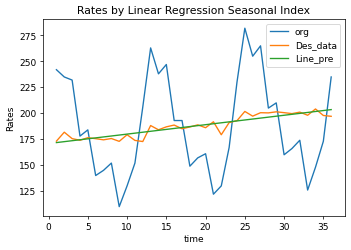

In [112]:
#2-4
y_data_df1_LR = df1_LR_Result['Des_D']
X_data_ar_df1 = np.array(t_r)
X_data_ar_df1_T = X_data_ar_df1.T
X_data_df1 = pd.DataFrame(X_data_ar_df1_T, columns = ['t'])
X_data_df1 = sm.add_constant(X_data_df1)
olsmod_df1_LR = sm.OLS(y_data_df1_LR, X_data_df1)
result_reg_df1_LR = olsmod_df1_LR.fit()
print(result_reg_df1_LR.summary())
print()
s = f"Estimated model: y = {result_reg_df1_LR.params[0]:.4f} "
for i in range(1, len(result_reg_df1_LR.params)):
    s += f'+ {result_reg_df1_LR.params[i]:.4f} {columns[i - 1]} '
print(s)
df1_LR_st_1, df1_LR_data_1, df1_LR_ss2_1 = sso.summary_table(result_reg_df1_LR, alpha=0.05)
df1_LR_y_pre_1 = df1_LR_data_1[:, 2]
df1_LR_SD_1 = df1_LR_data_1[:, 10]
des_pre_df1_LR = df1_LR_y_pre_1
print(des_pre_df1_LR)
plt.plot(t_r, df1_LR_Result['orig'])
plt.plot(t_r, df1_LR_Result['Des_D'])
plt.plot(t_r, des_pre_df1_LR)
plt.legend(labels=['org', 'Des_data', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Rates')
plt.title('Rates by Linear Regression Seasonal Index')
plt.show()

New Des Prediction [203.52700778 204.43525434 205.3435009  206.25174745 207.15999401
 208.06824056 208.97648712 209.88473368 210.79298023 211.70122679
 212.60947334 213.5177199 ]
New Seasonal Prediction [284.45940467 264.32010257 271.34980344 211.02001797 216.00996816
 165.9621776  173.75106698 181.6022495  134.08417828 153.47895491
 185.88299132 254.61012585]


,time,org,Des_data,Line_pre,Seasonal Pre
0,1.0,242.0,173.147855,171.738378,240.030045
1,2.0,235.0,181.757968,172.646625,223.219688
2,3.0,232.0,175.565604,173.554871,229.342930
3,4.0,178.0,173.977860,174.463118,178.496477
4,5.0,184.0,176.461481,175.371365,182.863313
5,6.0,140.0,175.519230,176.279611,140.606505
6,7.0,145.0,174.396573,177.187858,147.320781
7,8.0,152.0,175.672271,178.096104,154.097216
8,9.0,110.0,172.930379,179.004351,113.863618
9,10.0,130.0,179.315526,179.912597,130.432864


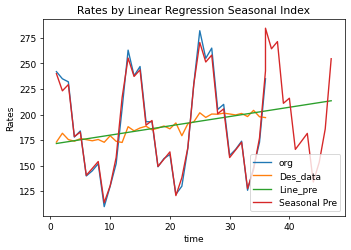

In [113]:
Sea_pre_df1_LR = des_pre_df1_LR * df1_LR_Result['SeaIdx']
New_t_1 = np.arange(36, 48, 1)
Total_t_1 = np.append(t_r, New_t_1)
New_t_1 = sm.add_constant(New_t_1)
df1_LR_des_pre_New_t_1 = result_reg_df1_LR.predict(New_t_1)
print('New Des Prediction', df1_LR_des_pre_New_t_1)
df1_LR_Sea_pre_New_t_1 = df1_LR_des_pre_New_t_1 * df1_LR_Idx
print('New Seasonal Prediction', df1_LR_Sea_pre_New_t_1)
New_Nan = np.zeros(New_t_1.shape[0])
New_Nan[:] = np.nan
df1_LR_New_orig_1 = np.append(df1_LR_Result['orig'], New_Nan)
df1_LR_New_Des_D_1 = np.append(df1_LR_Result['Des_D'], New_Nan)
df1_LR_New_des_pre_1 = np.append(des_pre_df1_LR, df1_LR_des_pre_New_t_1)
df1_LR_New_Sea_pre_1 = np.append(Sea_pre_df1_LR, df1_LR_Sea_pre_New_t_1)
df1_LR_S_a = np.array([Total_t_1, df1_LR_New_orig_1, df1_LR_New_Des_D_1, df1_LR_New_des_pre_1, df1_LR_New_Sea_pre_1])
df1_LR_S_df = pd.DataFrame(df1_LR_S_a.T, columns=['time', 'org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
display(df1_LR_S_df)
plt.plot(Total_t_1, df1_LR_New_orig_1)
plt.plot(Total_t_1, df1_LR_New_Des_D_1)
plt.plot(Total_t_1, df1_LR_New_des_pre_1)
plt.plot(Total_t_1, df1_LR_New_Sea_pre_1)
plt.legend(labels=['org', 'Des_data', 'Line_pre', 'Seasonal Pre'])
plt.xlabel('time')
plt.ylabel('Rates')
plt.title('Rates by Linear Regression Seasonal Index')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     327.0
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.02e-22
Time:                        17:20:35   Log-Likelihood:                -96.689
No. Observations:                  36   AIC:                             219.4
Df Residuals:                      23   BIC:                             240.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.2500      3.140     63.450      0.0

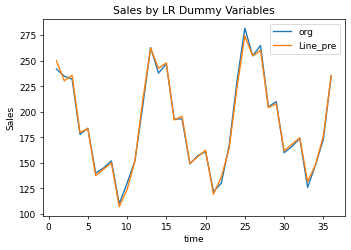

In [114]:
#2-5
Quarter_dummy = pd.get_dummies(df1['Month'], prefix = 'Quarter')
df1 = pd.concat([df1, Quarter_dummy], axis = 1)
df1.head()
y_data_df1 = df1['Sales']
td_r = np.arange(1, len(df1['Sales']) + 1, 1)
X_data_ar_df1 = np.array([td_r, df1['Quarter_1'], df1['Quarter_2'], df1['Quarter_3'], df1['Quarter_4'], df1['Quarter_5'], df1['Quarter_6'], df1['Quarter_7'], df1['Quarter_8'], df1['Quarter_9'], df1['Quarter_10'], df1['Quarter_11']])
X_data_ar_df1_T = X_data_ar_df1.T
columns = ['t', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Quarter_5', 'Quarter_6', 'Quarter_7', 'Quarter_8', 'Quarter_9', 'Quarter_10', 'Quarter_11']
X_data_df1 = pd.DataFrame(X_data_ar_df1_T, columns = ['t', 'Quarter_1', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Quarter_5', 'Quarter_6', 'Quarter_7', 'Quarter_8', 'Quarter_9', 'Quarter_10', 'Quarter_11'])
X_data_df1 = sm.add_constant(X_data_df1)
olsmod_df1_DM = sm.OLS(y_data_df1, X_data_df1)
result_reg_df1_DM = olsmod_df1_DM.fit()
print(result_reg_df1_DM.summary())
print()
s = f"Estimated model: y = {result_reg_df1_DM.params[0]:.4f} "
for i in range(1, len(result_reg_df1_DM.params)):
    s += f'+ {result_reg_df1_DM.params[i]:.4f} {columns[i - 1]} '
print(s)
df1_DM_st, df1_DM_data, df1_DM_ss2 = sso.summary_table(result_reg_df1_DM, alpha=0.05)
df1_DM_y_pre = df1_DM_data[:, 2]
df1_DM_SD = df1_DM_data[:, 10]
des_pre_df1_DM = df1_DM_y_pre
print('Fitted Values', des_pre_df1_DM)
plt.plot(td_r, df1['Sales'])
plt.plot(td_r, des_pre_df1_DM)
plt.legend(labels=['org', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Sales by LR Dummy Variables')
plt.show()
#忽略此quarter應為month

New Dummy Season Prediction [285.73263889 266.06597222 271.39930556 215.39930556 219.06597222
 173.06597222 179.39930556 185.73263889 142.73263889 159.39930556
 187.39930556 247.06597222]


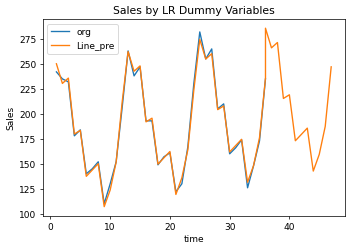

In [115]:
New_t = np.array([[36, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [37, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [38, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [39, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                  [40, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                  [41, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [42, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                  [43, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                  [44, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                  [45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                  [46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                  [47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Total_t = np.append(td_r, New_t[:,0])
New_t = sm.add_constant(New_t)
df1_DM_pre_New_t = result_reg_df1_DM.predict(New_t)
print('New Dummy Season Prediction', df1_DM_pre_New_t)
New_Nan = np.zeros(New_t.shape[0])
New_Nan[:] = np.nan
df1_DM_New_orig = np.append(df1['Sales'], New_Nan)
df1_DM_New_pre = np.append(des_pre_df1_DM, df1_DM_pre_New_t)
plt.plot(Total_t, df1_DM_New_orig)
plt.plot(Total_t, df1_DM_New_pre)
plt.legend(labels=['org', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Sales')
plt.title('Sales by LR Dummy Variables')
plt.show()

In [116]:
#2-6
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

In [117]:
print('Error Metrics for Seasonal Index by Moving Average')
df1_MA_Err_M = ErrMetrix(df1['Sales'], Sea_pre_df1_MA)
print('\n')
print('Error Metrics for Seasonal Index by LR')
df1_LR_Err_M = ErrMetrix(df1['Sales'], Sea_pre_df1_LR)
print('\n')
print('Error Metrics for LR Dummy')
df1d_DM_Err_M = ErrMetrix(df1['Sales'], des_pre_df1_DM)
ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
df1_ErrM_a = np.array([ErrM_id, df1_MA_Err_M, df1_LR_Err_M, df1d_DM_Err_M])
df1_ErrM_df = pd.DataFrame(df1_ErrM_a.T, columns = ['ErrM', 'SIMA', 'SILR', 'Dummy'])
print('dataset:')
display(df1_ErrM_df)

Error Metrics for Seasonal Index by Moving Average
MAD =  2.120856
MSE =  9.648205
RMSE =  3.106156
MAPE =  1.19256 %


Error Metrics for Seasonal Index by LR
MAD =  3.439553
MSE =  22.427574
RMSE =  4.735776
MAPE =  1.776819 %


Error Metrics for LR Dummy
MAD =  2.775463
MSE =  12.600694
RMSE =  3.549746
MAPE =  1.542938 %
dataset:


,ErrM,SIMA,SILR,Dummy
0,MAD,2.120856,3.439553,2.775463
1,MSE,9.648205,22.427574,12.600694
2,RMSE,3.106156,4.735776,3.549746
3,MAPE,1.19256,1.776819,1.542938


In this case, the multiregression model with 11 dummy variables to forcast the vintage sales yields the smallest value and thus is the best choice

In [118]:
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)
def ExSm(y_v, a):
    es_df = pd.DataFrame({'orig': y_v})
    es_df['es_res'] = es_df['orig'].ewm(alpha = a, adjust= False).mean()
    es_al_a = np.zeros(len(y_v) + 1)
    es_al_a[0] = es_df['es_res'][0]
    es_al_a[1] = es_df['es_res'][0]
    for i in range(2, len(y_v) + 1):
        es_al_a[i] = es_df['es_res'][i-1]
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = y_v.tolist()
    es_df_e = pd.DataFrame({'time':t1, 'orig': np.array(org_data + [float('nan')]), 'es_forecast': es_al_a})
    return {"es_forecast":es_df_e}
def MAF(y_v, p):
    ma_p_a = np.zeros(len(y_v) + 1)
    ma_p_a[:] = np.nan
    mvlen = p
    for i in range(mvlen, len(y_v) + 1):
        ma_p_a[i] = np.mean(y_v[i-mvlen: i])
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = np.append(y_v, [np.nan])
    ma_df_p = pd.DataFrame({'time':t1, 'orig': org_data, 'ma_forecast': ma_p_a})
    return {"ma_forecast":ma_df_p}
def EST(y_v, a, b, f0, y0, t0, p):
    est_fcast = np.zeros(len(y_v) + p + 1)
    est_et = np.zeros(len(y_v) + p + 1)
    est_fcast[0] = f0
    est_et[0] = t0
    y_v = np.insert(y_v, 0, y0, axis=0)
    print(y_v)
    for i in range(1, len(y_v)):
        est_fcast[i] = a*y_v[i-1] + (1-a)*est_fcast[i-1] + est_et[i - 1]
        latest_trend = a*(y_v[i] - y_v[i-1]) + (1-a)*(est_fcast[i] - est_fcast[i-1])
        print(latest_trend)
        est_et[i] = b*latest_trend + (1-b)*est_et[i-1]
    for i in range(len(y_v) , len(est_fcast)):
        est_fcast[i] = a*y_v[-1] + (1-a)*est_fcast[len(y_v) - 1] + (i - len(y_v) + 1)*est_et[len(y_v) - 1]
    print(est_fcast)
    print(est_et)
    t1 = range(0, len(y_v) + p)
    Ini_v = y0
    W_ini_v = y_v
    org_data = np.append(W_ini_v, [np.nan]*p)
    print(len(t1), len(org_data), len(est_fcast))
    print(t1)
    est_df_ab = pd.DataFrame({'time':t1, 'orig': org_data, 'est_forecast': est_fcast})
    return {"est_forecast":est_df_ab}
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

## Problem 3 (25 points)
##### You are a financial analyst for The Principled, a large financial services company. You need to better evaluate investment opportunities for your clients. To assist in the forecasting, you have collected time-series data on the revenues of a large company, The Coca-Cola Company. The Coca-Cola Company’s revenue (in billions of dollars) from 1995 through 2009 is listed in the spreadsheet “Coca” of Stat_2021_2_Fin.xlsx. Each year has the variables defined as follows:
* Column A (Year): The year of the data.
* Column B (Coded Year): The coded year started from 0.
* Column C (Revenues): The revenues (in billions of dollars).

##### Questions:
1. (3 points) Please plot the scatter diagrams by using Revenues as y and Coded Year as x. Please construct a simple linear trend regression model to forecast the amount of oil reserve by year as the independent variable. Please check the autocorrelation condition for the regression model by using Durbin-Watson statistic at $\alpha$ = 0.05. Is the model valid to be used in forecasting?
2. (3 points) Please construct a quadratic trend regression model to forecast the amount of Revenues by Coded Year as the independent variable. Please check the autocorrelation condition for the regression model by using Durbin-Watson statistic at $\alpha$ = 0.05. Is the model valid to be used in forecasting?
3. (5 points) Please plot the scatter diagrams by using Revenues as y and Revenues in the previous year as x. Please construct an autoregression model to forecast Revenues by Revenues in the previous year and year as independent variables. Please check the autocorrelation condition for the regression model by using Durbin-Watson statistic at $\alpha$ = 0.05. Based on the results of (1) to (3), which regression model would you recommend?
4. (2 points) Use exponential smoothing with $\alpha$ = 0.9 to forecast the Revenues for the next year. 
5. (2 points) Use 3-period moving average to forecast the Revenues for the next year.
6. (2 points) Use exponential smoothing with trends where $\alpha$ = 0.9, $\beta$ = 0.2, F0 = 18 and ET0 = 0.1 to forecast the Revenues for the next year.
7. (8 points) Compute the MSE, MAD, and MAPE for the above four methods from (3) to (7). Which one provides the best forecast?

In [119]:
#3-1
df1 = pd.read_excel(r"Stat_2021_2_Fin.xlsx", 'Coca')
print("Tail of dataset:")
display(df1.tail())

Tail of dataset:


,Year,Coded,Revenues
10,2005,10,23.1
11,2006,11,24.1
12,2007,12,28.9
13,2008,13,31.9
14,2009,14,31.0


In [120]:
result = smf.ols('Revenues~ Coded', data=df1).fit()
# Inspect the results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Revenues   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     50.04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           8.37e-06
Time:                        17:20:39   Log-Likelihood:                -31.794
No. Observations:                  15   AIC:                             67.59
Df Residuals:                      13   BIC:                             69.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0017      1.064     15.038      0.0

y = 16.0017 + 0.9150*Coded Year

### Autocorrelation
#### Durbin_Watson_test
$H_0$: The data are not first-order correlated

$H_1$: The data are first-order correlated

In [121]:
st, data, ss2 = sso.summary_table(result, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
#print(SD)
#print('mu = ', mu)
#print('sigma = ', sigma)
d_w = Durbin_Watson_test(SD)
print(d_w)

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]
x_square_sum =  15.303905814668976
size =  15
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -0.24476107 -0.27818143 -0.51091105  0.04099903 -0.10426921
 -0.62984421 -0.67539549  0.22980335 -0.01369405  0.12759826  0.0278083
  1.9353458   1.09703931 -0.90073673]
d =  0.46355328193155304
0.46355328193155304


K=2, T=15<br>
dL=0.94905, dU=1.22202<br>
since d = 0.4636 < dL, the first order correlation exist.

#3-2

,Year,Coded,Revenues,t,t2
0,1995,0,18.0,0,0
1,1996,1,18.5,1,1
2,1997,2,18.9,2,4
3,1998,3,18.8,3,9
4,1999,4,19.8,4,16


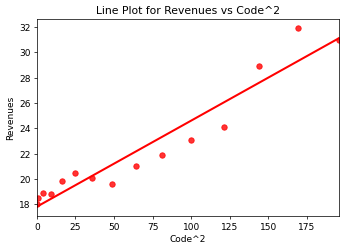

In [122]:
df2 = df1
df2['t'] = df2.index
df2['t2'] = df2['t']**2
display(df2.head())
sns.regplot(x = 't2', y = 'Revenues', data = df2, color = 'r', ci = None)
plt.title('Line Plot for Revenues vs Code^2')
plt.xlabel('Code^2')
plt.ylabel('Revenues')
plt.show()

In [123]:
result = smf.ols('Revenues~ t2', data=df2).fit()
# Inspect the results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               Revenues   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           1.52e-08
Time:                        17:20:41   Log-Likelihood:                -24.581
No. Observations:                  15   AIC:                             53.16
Df Residuals:                      13   BIC:                             54.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8120      0.508     35.043      0.0

### Autocorrelation
#### Durbin_Watson_test
$H_0$: The data are not first-order correlated

$H_1$: The data are first-order correlated

In [124]:
y_data = df2['Revenues'].values
X_data_ar = np.array([df2['t'], df2['t2']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['t', 't2'])
X_data = sm.add_constant(X_data)
df1_y1_t_olsmod = sm.OLS(y_data, X_data)
result_reg = df1_y1_t_olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     91.36
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           5.48e-08
Time:                        17:20:41   Log-Likelihood:                -22.735
No. Observations:                  15   AIC:                             51.47
Df Residuals:                      12   BIC:                             53.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0879      0.840     22.736      0.0

In [125]:
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
y_pre = data[:, 2]
SD = data[:, 10]
d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  15.516114706100659
size =  15
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          1.03634345  0.54794951 -0.09496877  0.68997654  0.26265824
 -0.87796929 -1.15628857  0.33918493 -0.27586419 -0.18892201 -0.54677523
  2.6045844   0.99326798 -3.12231073]
d =  1.423116147012895
1.423116147012895


K=3, T=15<br>
dL=0.0.82683, dU=1.4045<br>
since 2 > d = 1.4231 > dU, we can't conclude the first order correlation exist.
The model can pass the F-test and t-test, but the coefficient of t is negative, it's not a valid model

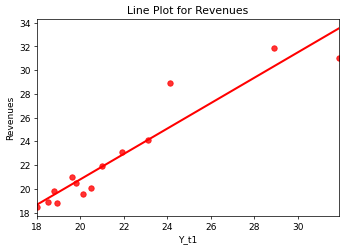

,Year,Coded,Revenues,t,t2,Y_t1
1,1996,1,18.5,1,1,18.0
2,1997,2,18.9,2,4,18.5
3,1998,3,18.8,3,9,18.9
4,1999,4,19.8,4,16,18.8
5,2000,5,20.5,5,25,19.8
6,2001,6,20.1,6,36,20.5
7,2002,7,19.6,7,49,20.1
8,2003,8,21.0,8,64,19.6
9,2004,9,21.9,9,81,21.0
10,2005,10,23.1,10,100,21.9


In [126]:
#3-3
df1['Y_t1'] = df1['Revenues'].shift(periods = 1)
df1_y1 = df1.dropna()
y_var = df1_y1['Revenues'].values
x_var_1 = df1_y1['Y_t1'].values
sns.regplot(x = x_var_1, y = y_var, data = df1_y1, color = 'r', ci = None)
plt.title('Line Plot for Revenues')
plt.xlabel('Y_t1')
plt.ylabel('Revenues')
plt.show()
df1_y1

In [127]:
t = np.arange(0, df1_y1.shape[0], 1)
y_data = df1_y1['Revenues'].values
X_data_ar = np.array([t, df1_y1['Y_t1'].values])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['time', 'Y_t1'])
X_data = sm.add_constant(X_data)
df1_y1_t_olsmod = sm.OLS(y_data, X_data)
result_reg = df1_y1_t_olsmod.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     64.51
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           8.39e-07
Time:                        17:20:42   Log-Likelihood:                -22.890
No. Observations:                  14   AIC:                             51.78
Df Residuals:                      11   BIC:                             53.70
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4570      3.172      1.090      0.2

In [128]:
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
#print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
auto_reg_y_pre = y_pre
#Studentized Residual
SD = data[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
#print(SD)
#print('mu = ', mu)
#print('sigma = ', sigma)
d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  16.37449056469552
size =  14
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -0.28761163 -0.59096458  0.58837189 -0.31084749 -0.94583068
 -0.38575977  1.10906738 -0.40298305  0.13238716 -0.20737119  2.94221466
 -0.76580774 -3.69747408]
d =  1.6052732465432502
1.6052732465432502


K=3, T=14<br>
dL=0.0.78624, dU=1.4092<br>
since 2> d = 1.605 > dU, the first order correlation does not exist.

Among the above 3 method, I would recommend the third one(autoregression), since it is a valid model and has a high r-square.

,time,orig,es_forecast
0,1.0,18.0,18.000000
1,2.0,18.5,18.000000
2,3.0,18.9,18.450000
3,4.0,18.8,18.855000
4,5.0,19.8,18.805500
5,6.0,20.5,19.700550
6,7.0,20.1,20.420055
7,8.0,19.6,20.132006
8,9.0,21.0,19.653201
9,10.0,21.9,20.865320


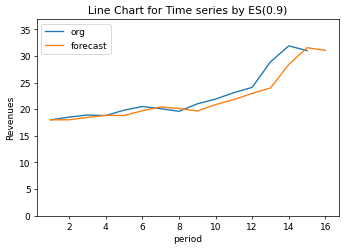

In [129]:
#3-4
es02_result = ExSm(df1["Revenues"], 0.9)
es02_result_df = []
es02_result_df = pd.DataFrame(es02_result['es_forecast'])
display(es02_result_df)
plt.plot(es02_result_df['time'], es02_result_df['orig'])
plt.plot(es02_result_df['time'], es02_result_df['es_forecast'])
plt.ylim(0, max(df1["Revenues"])+5)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('period')
plt.ylabel('Revenues')
plt.title('Line Chart for Time series by ES(0.9)')
plt.show()

the predicted revenue for next year is 31.055(billions of dollars).

,time,orig,ma_forecast
0,1.0,18.0,NaN
1,2.0,18.5,NaN
2,3.0,18.9,NaN
3,4.0,18.8,18.466667
4,5.0,19.8,18.733333
5,6.0,20.5,19.166667
6,7.0,20.1,19.700000
7,8.0,19.6,20.133333
8,9.0,21.0,20.066667
9,10.0,21.9,20.233333


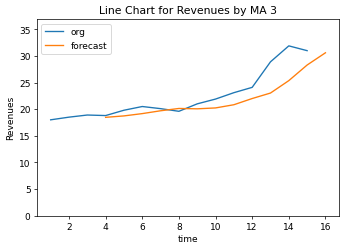

In [130]:
#4-5
ma03_result = MAF(df1['Revenues'], 3)
ma03_result_df = []
ma03_result_df = pd.DataFrame(ma03_result['ma_forecast'])
display(ma03_result_df)

plt.plot(ma03_result_df['time'], ma03_result_df['orig'])
plt.plot(ma03_result_df['time'], ma03_result_df['ma_forecast'])
plt.ylim(0, max(df1["Revenues"])+5)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('time')
plt.ylabel('Revenues')
plt.title('Line Chart for Revenues by MA 3')
plt.show()

the predicted revenue for next year is 30.6(billions of dollars).

#4-6 Use exponential smoothing with trends where $\alpha$ = 0.9, $\beta$ = 0.2, F0 = 18 and ET0 = 0.1 to forecast the Revenues for the next year.

[18.  18.  18.5 18.9 18.8 19.8 20.5 20.1 19.6 21.  21.9 23.1 24.1 28.9
 31.9 31. ]
0.01000000000000014
0.44919999999999977
0.41226399999999896
-0.043637119999998586
0.8906274496000005
0.7337409656319991
-0.27802105657855875
-0.4911534686154749
1.1959409145316175
0.9513809882306354
1.1876764177190262
1.0335242054784384
4.432074627268259
3.218156236538956
-0.45250372511098513
[18.         18.1        18.092      18.61464    19.0782688  18.9845433
 20.02195295 20.84174239 20.4302077  19.78961685 21.20342673 22.28019091
 23.61543296 24.73617923 29.9177416  33.49270435 32.59151384]
[0.1        0.082      0.15544    0.2068048  0.15671642 0.30349862
 0.38954709 0.25603346 0.10659608 0.32446504 0.44984823 0.59741387
 0.68463594 1.43412367 1.79093019 1.3422434  0.        ]
17 17 17
range(0, 17)


,time,orig,est_forecast
0,0,18.0,18.000000
1,1,18.0,18.100000
2,2,18.5,18.092000
3,3,18.9,18.614640
4,4,18.8,19.078269
5,5,19.8,18.984543
6,6,20.5,20.021953
7,7,20.1,20.841742
8,8,19.6,20.430208
9,9,21.0,19.789617


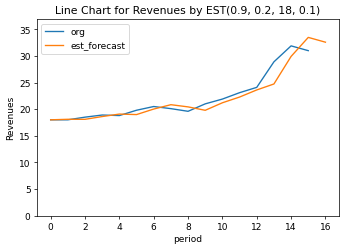

In [131]:
# alpha, beta, f0, y0, t0, 要預測的期數
esm_ab_result = EST(np.array(df1["Revenues"]), 0.9, 0.2, 18, 18, 0.1, 1)
esm_ab_result_df = []
esm_ab_result_df = pd.DataFrame(esm_ab_result['est_forecast'])
display(esm_ab_result_df)
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['orig'])
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['est_forecast'])
plt.ylim(0, max(df1["Revenues"])+5)
plt.legend(labels=['org', 'est_forecast'])
plt.xlabel('period')
plt.ylabel('Revenues')
plt.title('Line Chart for Revenues by EST(0.9, 0.2, 18, 0.1)')
plt.show()

the predicted revenue for next year is 32.59(billions of dollars).

In [132]:
#4-7
f_p = len(df1)
orig_result_a = np.array(ma03_result_df['orig'][3:f_p])
ma03_result_a = np.array(ma03_result_df['ma_forecast'][3:f_p])
es02_result_a = np.array(es02_result_df['es_forecast'][3:f_p])
esm_ab_result_a = np.array(esm_ab_result_df['est_forecast'][4:f_p+1])
auto_reg_result_a = auto_reg_y_pre[len(auto_reg_y_pre) - (f_p - 3):]

print(auto_reg_result_a)
print('Error Metrics for Moving Average with n = 3')
MA03_Err_M = ErrMetrix(orig_result_a, ma03_result_a)

print('\n')
print('Error Metrics for Exponential Smoothing with alpha = 0.9')
ES02_Err_M = ErrMetrix(orig_result_a, es02_result_a)

print('\n')
print('Error Metrics for Holts Exponential Smoothing with alpha = 0.9 and beta = 0.2')
ESMAB_Err_M = ErrMetrix(orig_result_a, esm_ab_result_a)

print('\n')
print('Error Metrics for AUTOREG')
AUTOREG_Err_M = ErrMetrix(orig_result_a, auto_reg_result_a)

ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
ch20_ts1_ErrM_a = np.array([ErrM_id, MA03_Err_M, ES02_Err_M, ESMAB_Err_M, AUTOREG_Err_M])
ch20_ts1_ErrM_df = pd.DataFrame(ch20_ts1_ErrM_a.T, columns = ['ErrM', 'MA03', 'ES09', 'ESM92', 'Auto Reg'])

print('dataset:')
display(ch20_ts1_ErrM_df)

[19.01849467 19.25449345 20.35951929 21.22753776 21.22652916 21.14651811
 22.56755379 23.59357718 24.85660794 25.96163378 30.0687531  32.75382814]
Error Metrics for Moving Average with n = 3
MAD =  2.144444
MSE =  8.421667
RMSE =  2.902011
MAPE =  8.203882 %


Error Metrics for Exponential Smoothing with alpha = 0.9
MAD =  1.372626
MSE =  3.709029
RMSE =  1.925884
MAPE =  5.392847 %


Error Metrics for Holts Exponential Smoothing with alpha = 0.9 and beta = 0.2
MAD =  1.249487
MSE =  2.712318
RMSE =  1.646912
MAPE =  4.918604 %


Error Metrics for AUTOREG
MAD =  1.020521
MSE =  1.719045
RMSE =  1.311123
MAPE =  4.091527 %
dataset:


,ErrM,MA03,ES09,ESM92,Auto Reg
0,MAD,2.144444,1.372626,1.249487,1.020521
1,MSE,8.421667,3.709029,2.712318,1.719045
2,RMSE,2.902011,1.925884,1.646912,1.311123
3,MAPE,8.203882,5.392847,4.918604,4.091527


Based on the MAD, MSE, MAPE for the four method, the Auto-regression yields the smallest value and thus ais the best choice.

## Problem 4 (20 points)
##### Kevin owns and operates a national chain of women’s apparel stores. Five thousand copies of an expensive four-color sales catalog have been printed and each catalog includes a coupon that provides a $50 discount on purchases of $200 or more. The catalogs are expensive and Kevin would like to send them to only those customers who have the highest probability of using the coupon. Management thinks that annual spending at Kevin Stores and whether a customer has a Kevin credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon. Kevin conducted a pilot study using a random sample of 50 Kevin credit card customers and 50 other customers who do not have a Kevin credit card. Kevin sent the catalog to each of the 100 customers selected. At the end of a test period, Kevin noted whether the customer used the coupon. The sample data for the 100 catalog recipients are shown in the spreadsheet “Kevin” of Stat_2021_2_Fin.xlsx. The columns of this spreadsheet are defined as follows: 
* Column A (Customer): The catalog recipient number.
* Column B (Spending): Annual Spending (in 1000 dollars).
* Column C (Card): Kevin Card (1 if the customer has a Kevin card and 0 if not).
* Column D (Coupon): Coupon usage (1 if the sampled customer used the coupon and 0 if not).

##### Questions:
1. (4 points) Please plot a scatter diagram for two pair sets of data (Coupon as y and Spending as x) by Card. What can you infer the relationships between Coupon and Spending? Are there interactions between Card and Spending?
2. (4 points) Please calculate the coefficients of correlation among all the variables. Can you infer the same relationships among these variables as seen in the scatter diagram?
3. (4 points) Develop an estimated logistic regression equation that can be used to predict “Coupon” given that Spending and Card as independent variables. Is there any multicollinearity problem in this regression equation?
4. (2 points) Please interpret the coefficients of the logistic regression equation in (3). 
5. (6 points) Suppose Kevin wants to send the promotional catalog only to customers who have a 0.40 or higher probability of using the coupon. Please use the model in (3) to predict the probability of using the coupon for customers who spend 1000, 2000, 3000, 4000, 5000, 6000, and 7000 dollars annually and with or without a Kevin Card. Using these estimated probabilities, what is a decision recommendation concerning the Kevin Stores catalog promotion strategy?

In [133]:
df1 = pd.read_excel('Stat_2021_2_Fin.xlsx', sheet_name = 'Kevin')
print("Tail of dataset:")
display(df1.tail())

Tail of dataset:


,Customer,Spending,Card,Coupon
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0
99,100,3.411,0,1


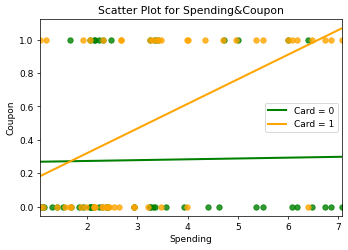

In [134]:
#4-1
df1_c1 = df1[df1.Card == 0]
df1_c2 = df1[df1.Card == 1]

_ = sns.regplot(x='Spending', y= 'Coupon', data = df1_c1, color = 'green', ci = None)
_ = sns.regplot(x='Spending', y= 'Coupon', data = df1_c2, color = 'orange', ci = None)
plt.legend(labels=['Card = 0', 'Card = 1'])
plt.title('Scatter Plot for Spending&Coupon')
plt.xlabel('Spending')
plt.ylabel('Coupon')
plt.show()

It appears that when Card = 0, the spending seems to have 0 relationship with whether the custumer use a coupon, but when Card = 1, Spending and Coupon has positive relationship, people may use the coupon when spend increase. The two lines has an intersection.<br>

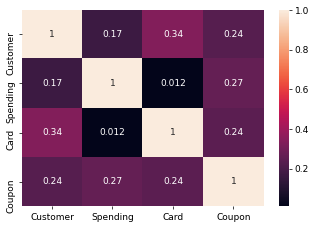

In [135]:
#4-2
df1a = df1[df1.columns]
corr1 = df1a.corr()
_ = sns.heatmap(corr1, annot=True)

we can see that there are positive relationship between coupon&customer, coupon&spending(which correspond to our previous scatter plot) and coupon&card also appears positive relationship. 

In [136]:
#4-3
y_data = df1['Coupon']
X_data_ar = np.array([ df1['Spending'], df1["Card"]])
X_data_T = X_data_ar.T
columns = ['Spending', 'Card']
X_data = pd.DataFrame(X_data_T, columns = ['Spending', 'Card'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result = olsmod.fit()
print(result.summary())
print()
s = f"Estimated model: y = {result.params[0]:.4f} "
for i in range(1, len(result.params)):
    s += f'+ {result.params[i]:.4f} {columns[i - 1]} '
print(s)

                            OLS Regression Results                            
Dep. Variable:                 Coupon   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     7.282
Date:                Wed, 01 Jun 2022   Prob (F-statistic):            0.00113
Time:                        17:20:50   Log-Likelihood:                -63.544
No. Observations:                 100   AIC:                             133.1
Df Residuals:                      97   BIC:                             140.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.110      0.282      0.7

There is no correlation between variables bigger than 0.7 or smaller than -0.7.

Coefficients of Spending, Card > 0 is accordance to our scatter plot and heatmap.

pvalue of f test < 0.05 and there is at least one pvalue of $b_i$ < 0.5 which means is not equal to zero so we can assume that the model doesn't have multicollinearity problem.

#4-4<br>
the coefficient of Spending is 0.0751, it means that every additional dollar a customer spend, the probability of using the coupon increase by 0.0751.<br>
the coefficient of Card is 0.2370, it means that if a customer has a card, the probability of using the coupon increase by 0.2370.<br>

#4-5 Suppose Kevin wants to send the promotional catalog only to customers who have a 0.40 or higher probability of using the coupon. Please use the model in (3) to predict the probability of using the coupon for customers who spend 1000, 2000, 3000, 4000, 5000, 6000, and 7000 dollars annually and with or without a Kevin Card. Using these estimated probabilities, what is a decision recommendation concerning the Kevin Stores catalog promotion strategy?

In [137]:
for i in range(1000, 8000, 1000):
    p0 = 0.0311+0.0751*(i/1000)
    p1 = p0+0.2370
    print("the probability a customer who spend {i} dollars and without Kevin card is {p}".format(i=i,p=p0))
    print("the probability a customer who spend {i} dollars and with a  Kevin card is {p}".format(i=i,p=p1))

the probability a customer who spend 1000 dollars and without Kevin card is 0.1062
the probability a customer who spend 1000 dollars and with a  Kevin card is 0.3432
the probability a customer who spend 2000 dollars and without Kevin card is 0.1813
the probability a customer who spend 2000 dollars and with a  Kevin card is 0.4183
the probability a customer who spend 3000 dollars and without Kevin card is 0.2564
the probability a customer who spend 3000 dollars and with a  Kevin card is 0.4934
the probability a customer who spend 4000 dollars and without Kevin card is 0.3315
the probability a customer who spend 4000 dollars and with a  Kevin card is 0.5685
the probability a customer who spend 5000 dollars and without Kevin card is 0.4066
the probability a customer who spend 5000 dollars and with a  Kevin card is 0.6436
the probability a customer who spend 6000 dollars and without Kevin card is 0.4817
the probability a customer who spend 6000 dollars and with a  Kevin card is 0.7187
the 

* we can recommend Kevin to send promotional catalog to : 
    - if the customer has card, we choose who spend more than 2000 dollars annually
    - if not, we choose who spend more than 5000 dollars annually